# Balls and Bins experiments
## Introduction
This notebook will show experimental results of several balls and bins questions. The events that will be examined will be: the Classic Birthday Paradox, the Triple Birthday Paradox, the Coupon Collector, Max Load and Largest Average Load. The first part will show and discuss the results of each experiment and the final part will be an interactive section where you can change the number of balls and bins for each experiment.

Import functions:

In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import random, numpy, math
%matplotlib inline

## Classic Birthday Paradox
The birthday paradox is the event of a collision of two balls in the same bin. We design an experiment that throws $m$ number of balls into $n$ bins. Then we take $k$ number of samples to figure out the approximate probability of there being a collision for a $m,n$ set. This is then plotted to show the results.

In [2]:
######################### Function declarations ########################        
# Runs and plots the collision experiment
def coll_experiment(bins, balls, samples):
    collisions = 0
    bin_set = set() # We use a set instead
    for i in range(samples):
        for j in range(int(balls)):
            chosen_bin = random.randint(0, bins) # Throw ball
            if (chosen_bin in bin_set):
                collisions += 1 # Collision detected
                break;
            else:
                bin_set.add(chosen_bin)
        bin_set = set() # Reset bins
        
    prob = collisions/samples
    plt.rcParams["figure.figsize"] = (15,10)
    plt.plot(balls, prob, 'o')
    plt.xlabel("Number of balls")
    plt.ylabel("Experimental Probability") 
    return prob


def run_cols(bins, samples, start_balls, max_balls, stop):
    if stop:
        counter = 0 # Prevents the graph from just being a bunch of prob == 1
    balls = int(start_balls)
    while balls < int(max_balls):
        prob = coll_experiment(bins, balls, samples)
        
        if stop:
            if (prob == 1):
                counter += 1
            else:
                counter = 0
            if counter == 10:
                break;
        if bins > 10000:
            balls += 5
        else: 
            balls += 1
    plt.show()

We run this experiment for $n = 100, 1000, 10000, 100000, 1000000$:

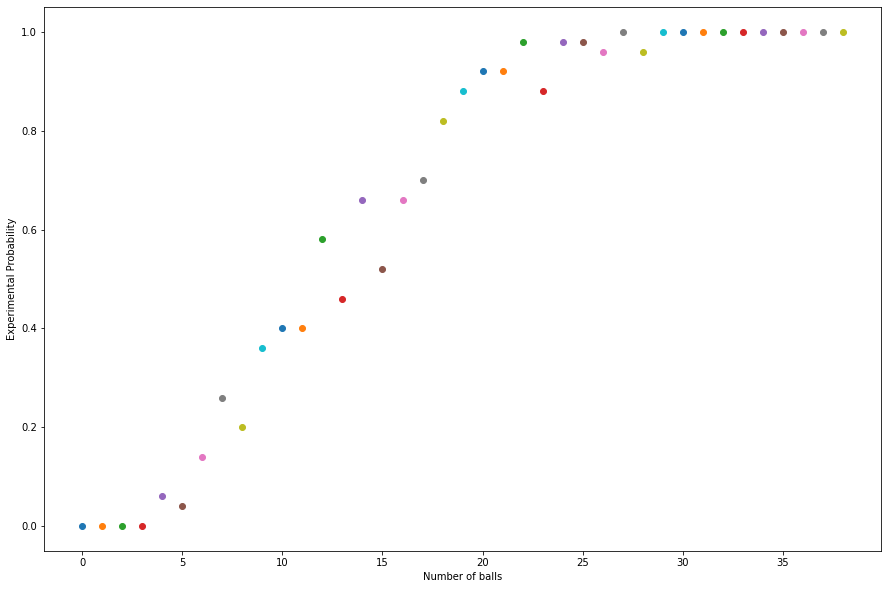

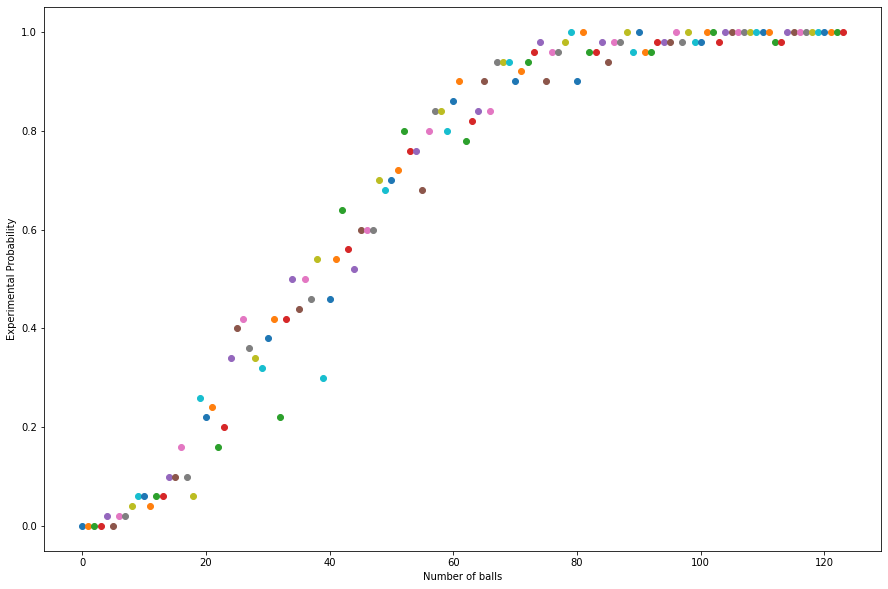

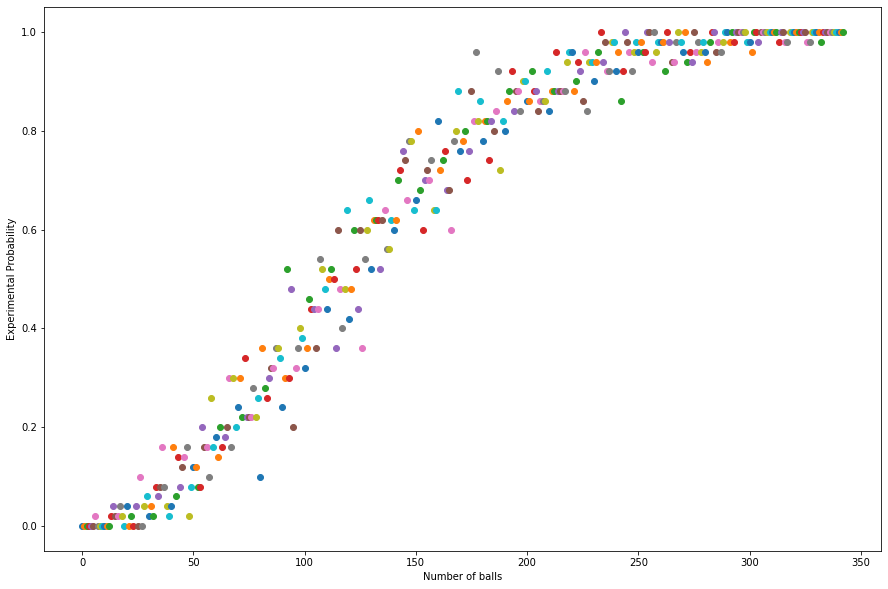

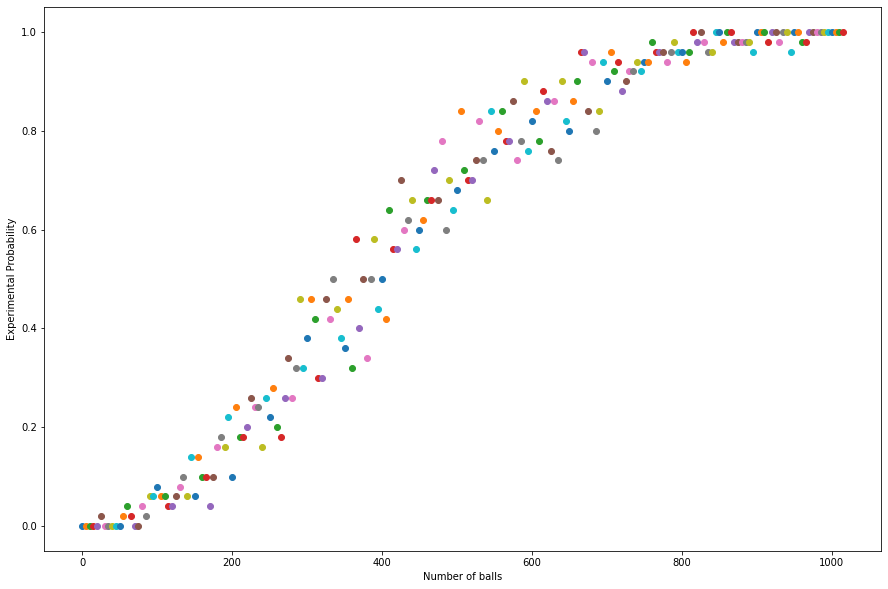

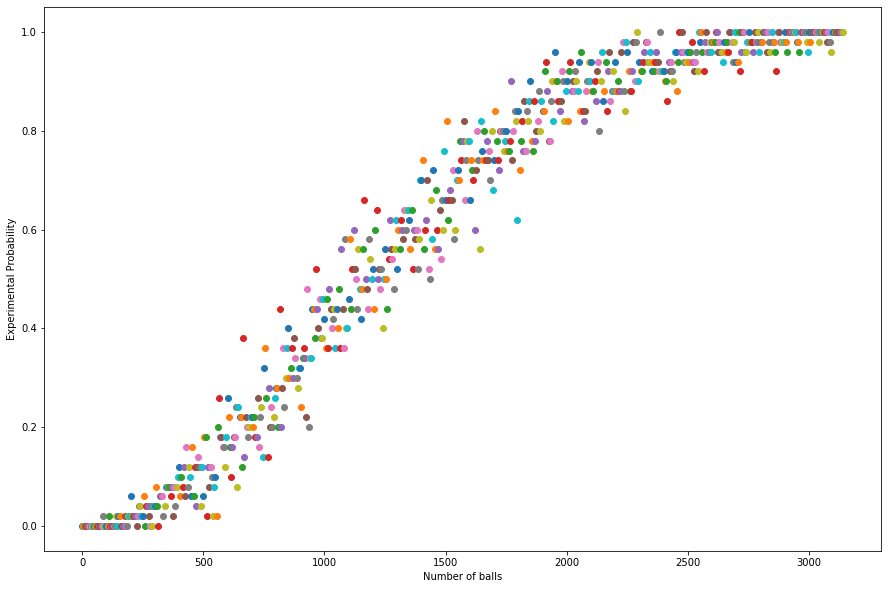

In [3]:
########################### Experiments ##############################
# Run collision experiments
samples = 50
run_cols(100, samples, 0, 1000, True)
run_cols(1000, samples, 0, 10000, True)
run_cols(10000, samples, 0, 100000, True)
run_cols(100000, samples, 0, 1000000, True)
run_cols(1000000, samples, 0, 10000000, True)

Furthermore, when we zoom into $m = \frac{1}{3}\cdot\lceil\sqrt{n}\rceil$ and $m = 3\lceil \sqrt{n}\rceil$ and see that this region is when the probability that a collion occurs goes from 0 to 1.

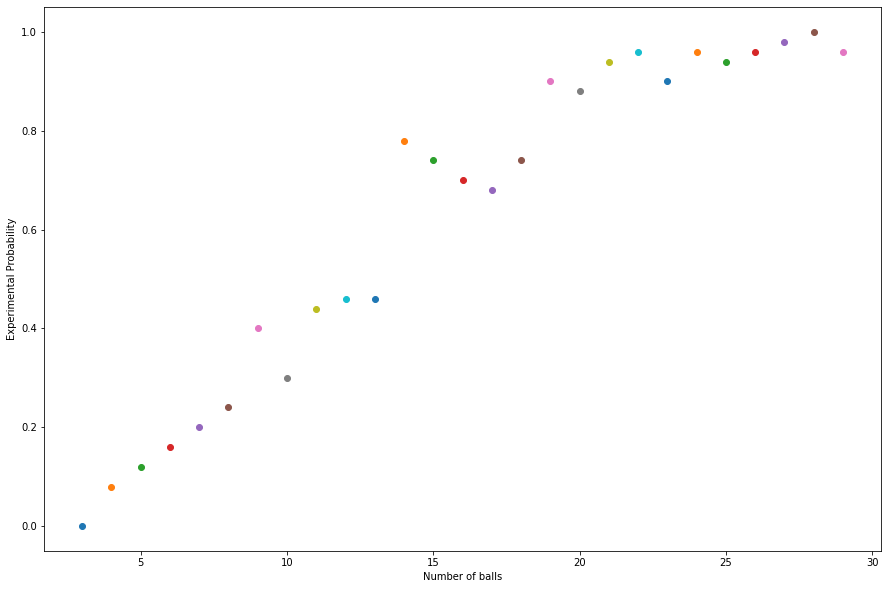

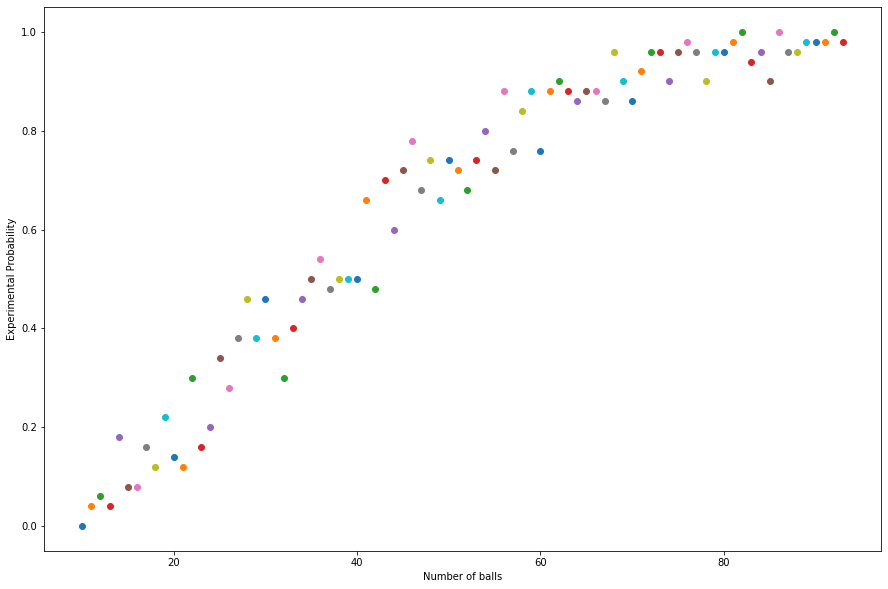

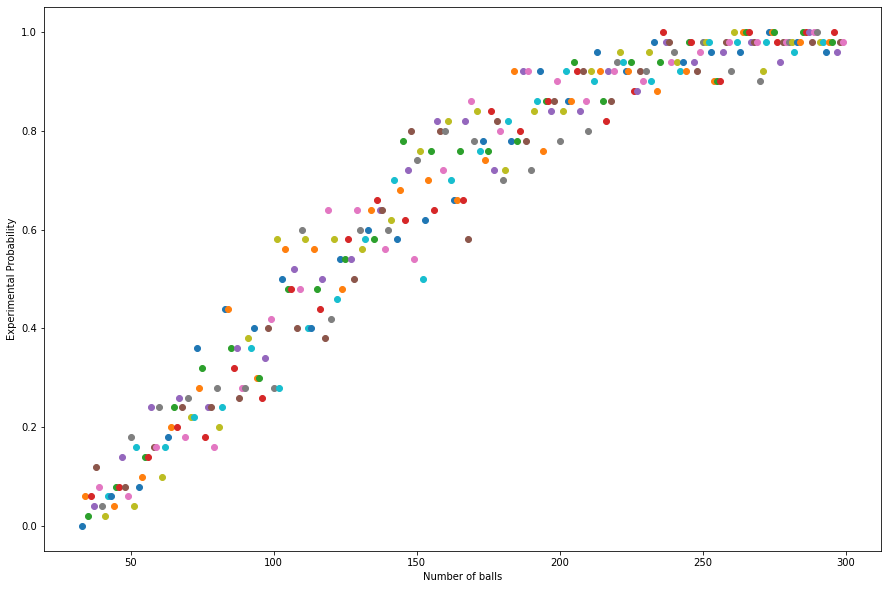

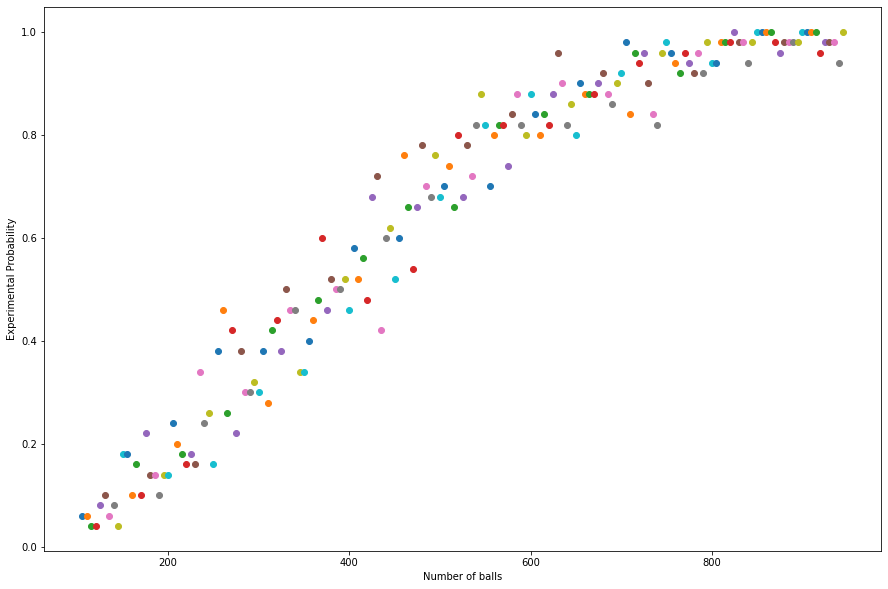

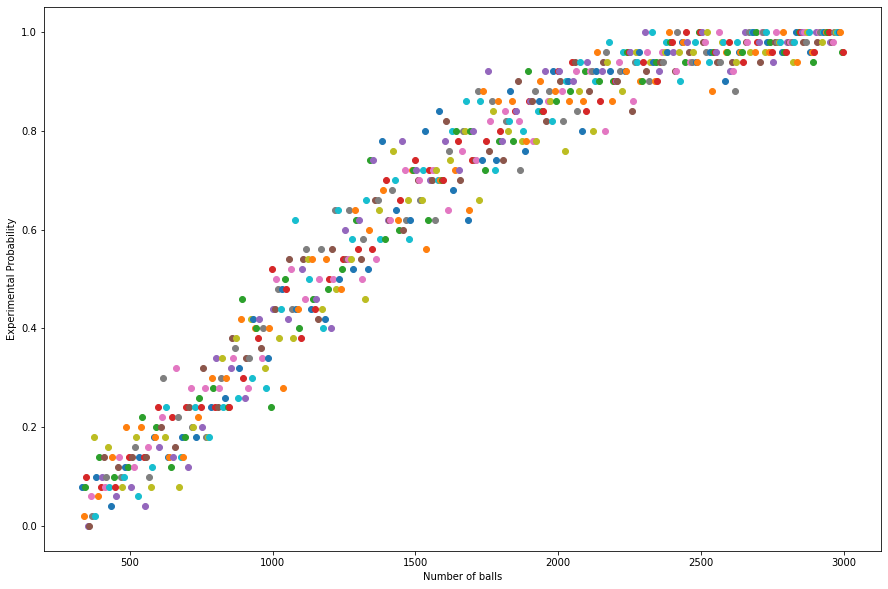

In [4]:
run_cols(100, samples, 1/3 * math.sqrt(100), 3 * math.sqrt(100), False)
run_cols(1000, samples, 1/3 * math.sqrt(1000), 3 * math.sqrt(1000), False)
run_cols(10000, samples, 1/3 * math.sqrt(10000), 3 * math.sqrt(10000), False)
run_cols(100000, samples, 1/3 * math.sqrt(100000), 3 * math.sqrt(100000), False)
run_cols(1000000, samples, 1/3 * math.sqrt(1000000), 3 * math.sqrt(1000000), False)

Therefore, we can infer that there is a constant $c_1 \approx \frac{1}{3}$ such that $\Pr[\text{Collision occurs}] < 0.01$ if $m = c_1\sqrt{n}$. And similarly, there exists a constant $c_2 \approx 3$ such that $\Pr[\text{Collision occurs}] < 0.99$ if $m = c_2\sqrt{n}$.

## Triple Birthday Paradox
This is very similar to the Classic Birthday Paradox, but the only difference is that we are interested in the event that at least three balls are in the same bin. Below, we design a similar experiment as above:

In [5]:
########################## Function declaration #############################
# triple collision experiment for balls and bins. Returns True if event occured.
def tricol_bnb(bins, balls):
    bin_dict = {}
    for j in range(balls):
        chosen_bin = random.randint(0, bins) # Throw ball
        if (chosen_bin in bin_dict):
            if (bin_dict[chosen_bin] >= 2):
                return True
            else:
                bin_dict[chosen_bin] += 1 # Add one ball to chosen bin
        else:
            bin_dict[chosen_bin] = 1
    return False

def run_tricol(samples, bins):
    plt.rcParams["figure.figsize"] = (15,10)
    coll = 0
    balls = int(math.sqrt(bins))
    counter = 0 # Prevents probability 1 towards the end
    while (balls < 2*bins):
        for i in range(samples):
            if (tricol_bnb(bins, balls)):
                coll += 1
        prob = coll/samples
        plt.xlabel("Number of balls")
        plt.ylabel("Experimental probability")
        plt.plot(balls, prob, 'o')
        coll = 0
        # Prevents probability 1 towards the end; keeps graph clean
        if (prob == 1):
            counter += 1
        else:
            counter = 0
        if counter == 10:
            break;
        balls += int(bins/samples * 10)
    plt.show()

Run this experiment for $n = 100, 1000, 10000$.

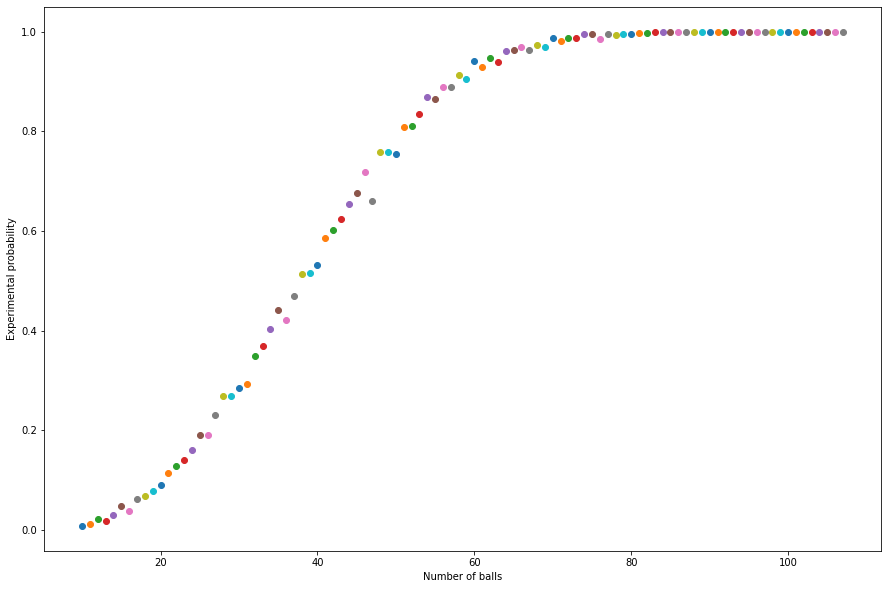

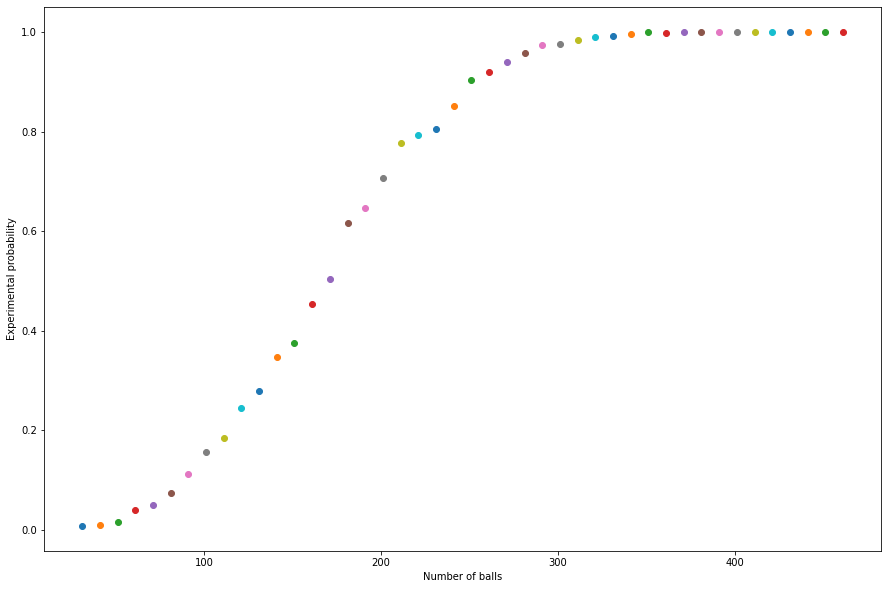

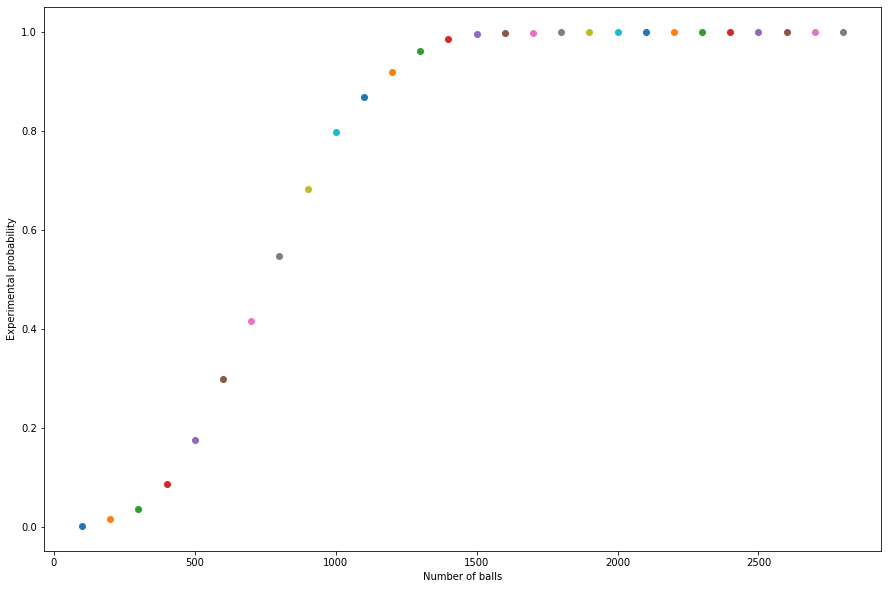

In [6]:
########################### Run experiments ##############################
samples = 1000
run_tricol(samples, 100)
run_tricol(samples, 1000)
run_tricol(samples, 10000)

We can see that the $m$ such that $Pr[\text{triCol happens}] \approx \frac{1}{2}$ is approximately around $m = 4n^{\frac{2}{3}}$.

## Coupon Collector
The coupon collector problem is interested in the probability of the event where all bins are non-zero; that is, all bins have at least one ball.

In [7]:
########################## Function declaration #############################
# A coupon collector simulator that returns True if and only if all bin is non-zero
def coupon(bins, balls):
    bin_dict = {}
    for i in range(balls):
        nonempty_bins = 0
        chosen_bin = random.randint(0, bins) # Throw ball
        if chosen_bin in bin_dict:
            bin_dict[chosen_bin] += 1 # Add one ball to chosen bin
        else:
            bin_dict[chosen_bin] = 1
        for key in bin_dict:
            if bin_dict[key] == 0: # Unless every bin has a ball, continue
                break;
            nonempty_bins += 1
        if (nonempty_bins == bins):
            return True
    return False

# Function that runs and plots the coupon collector problem
def run_coupons(samples, bins):
    plt.rcParams["figure.figsize"] = (15,10)
    event = 0
    balls = bins
    count = 0 # Reduce running time by stopping once prob = 1
    while (balls < 10 * bins):
        for i in range(samples):
            if (coupon(bins, balls)):
                event += 1
        prob = event/samples
        if prob == 1:
            count += 1
        if count == 30:
            break
        plt.xlabel("Number of balls")
        plt.ylabel("Experimental probability")
        plt.plot(balls, prob, 'o')
        event = 0
        if (bins > 50):
            balls += 5
        else:
            balls += 1
    plt.show()

We run this experiment for $n=10$ and $100$.

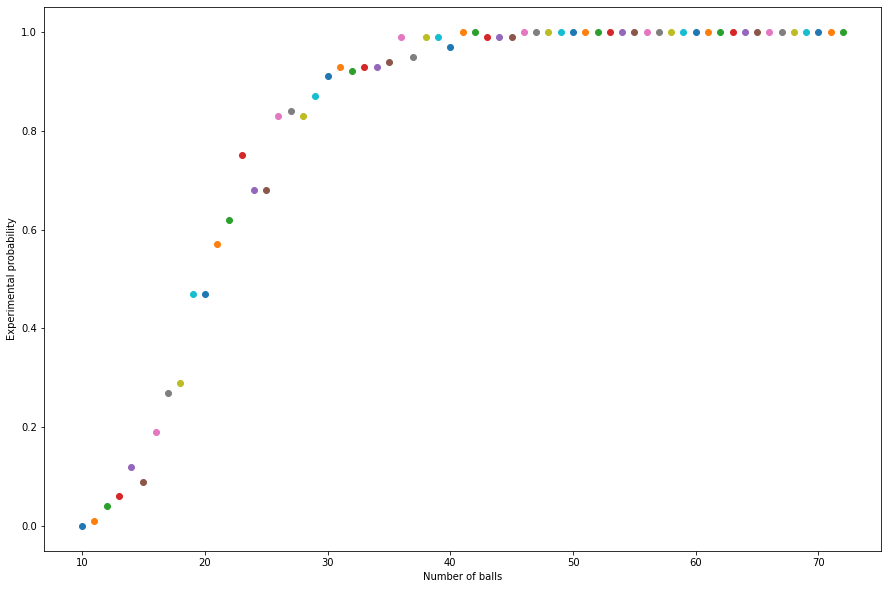

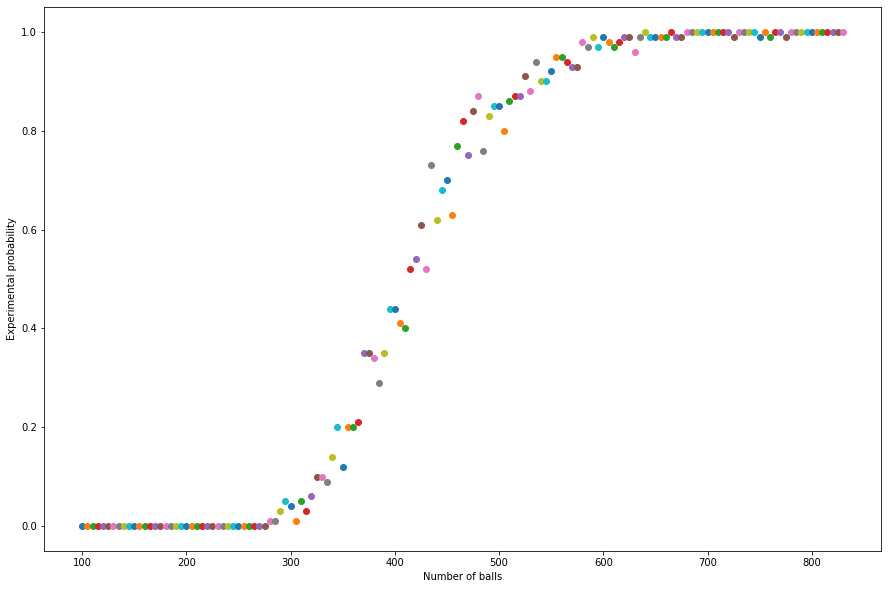

In [8]:
########################### Run experiments ##############################
samples = 100
run_coupons(samples, 10)
run_coupons(samples, 100)

## Max Load
Here, instead of an event, we look at the average max load after the balls and bins experiment when the number of balls and bins are equal. Below is the function:

In [9]:
########################## Function declaration #############################
# Default experiment for balls and bins. Returns a dictionary that maps (bin, # of balls)
def simulate_bnb(bins, balls):
    bin_dict = {}
    for j in range(balls):
        chosen_bin = random.randint(0, bins) # Throw ball
        if (chosen_bin in bin_dict):
            bin_dict[chosen_bin] += 1 # Add one ball to chosen bin
        else:
            bin_dict[chosen_bin] = 1
    return bin_dict

# Runs the balls and bins for balls = bins and plots distribution of max load
def max_load(samples, bins, balls):
    plt.rcParams["figure.figsize"] = (15,10)
    max_distrib = []
    for i in range(samples):
        bin_dict = simulate_bnb(bins, balls)
        max = 0
        for key in bin_dict:
            if (bin_dict[key] > max):
                max = bin_dict[key]
        max_distrib.append(max) 
    plt.hist(max_distrib)
    plt.xlabel("Max Load")
    plt.ylabel("Frequency")
    plt.show()

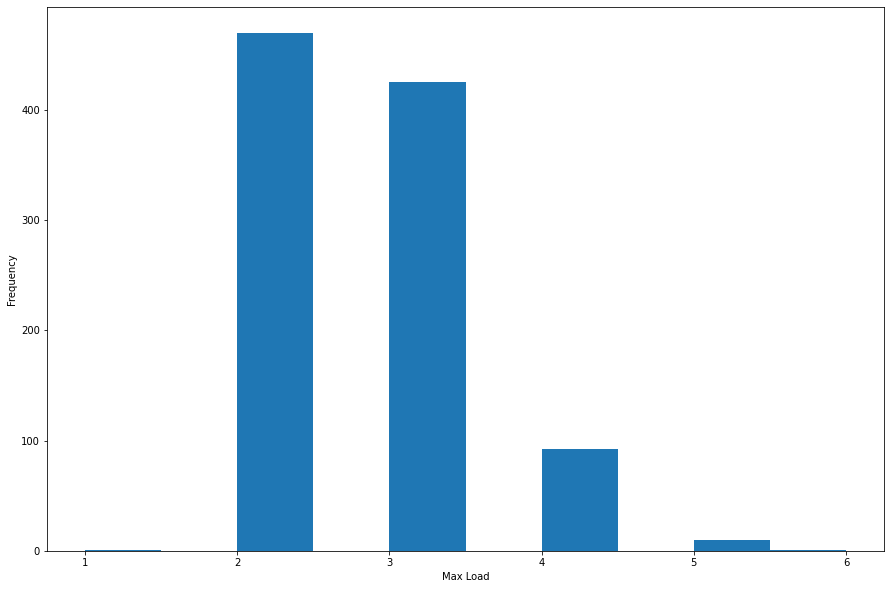

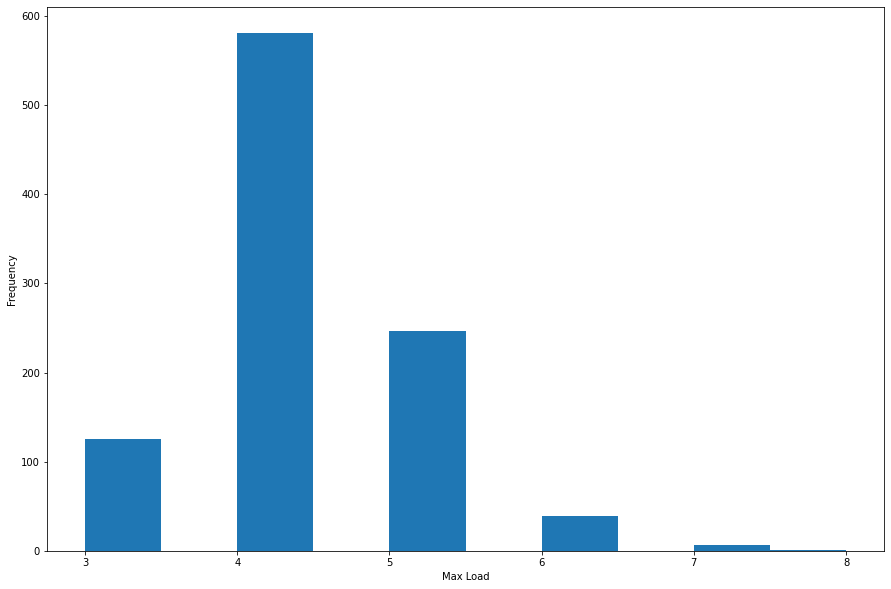

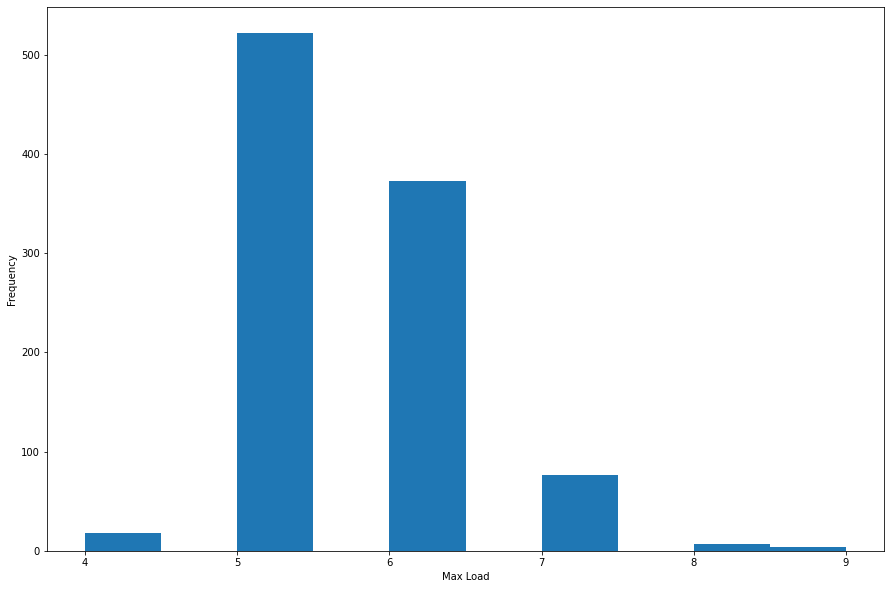

In [10]:
########################### Run experiments ##############################
max_load(1000, 10, 10)
max_load(1000, 100, 100)
max_load(1000, 1000, 1000)

## Largest average Load
In this section we design an experiment that shows several of the largest average load. That is, after doing the balls and bins experiment with $m = n$, we take the largest loads. We then average this number over $1000$ samples.

In [11]:
########################## Function declaration #############################
# Function that plots the greatest average loads
def average_load(samples, bins, balls):
    plt.rcParams["figure.figsize"] = (15,10)
    avg_distrib = []
    plot_number = int(math.sqrt(bins))
    for i in range(samples):
        bin_dict = simulate_bnb(bins, balls)
        sort = sorted(bin_dict.values(), reverse=True)[:plot_number]
        for j in range(len(sort)):
            if j > len(avg_distrib) - 1:
                avg_distrib.append(sort[j])
            else:
                avg_distrib[j] += sort[j] # Add to distribution
    for i in range(len(avg_distrib)):
        avg_distrib[i] /= samples # Take average
    plt.xlabel("Bin with largest to smallest load in a trial")
    plt.ylabel("Average Load")
    plt.bar(range(plot_number), avg_distrib)
    plt.show()

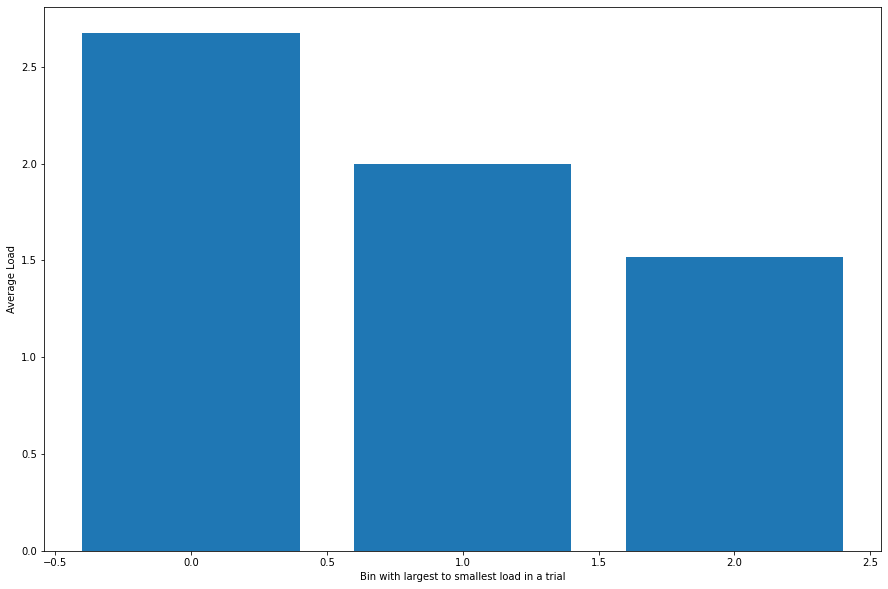

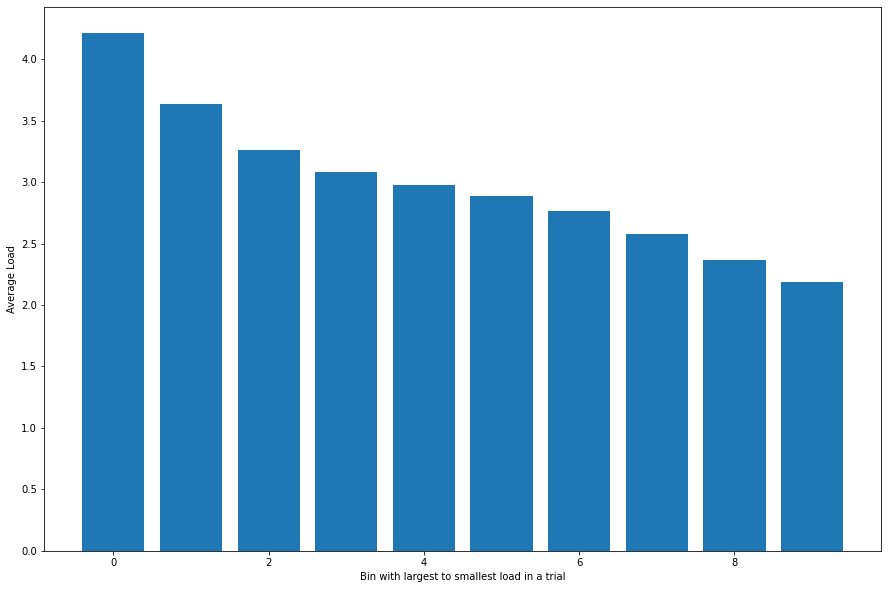

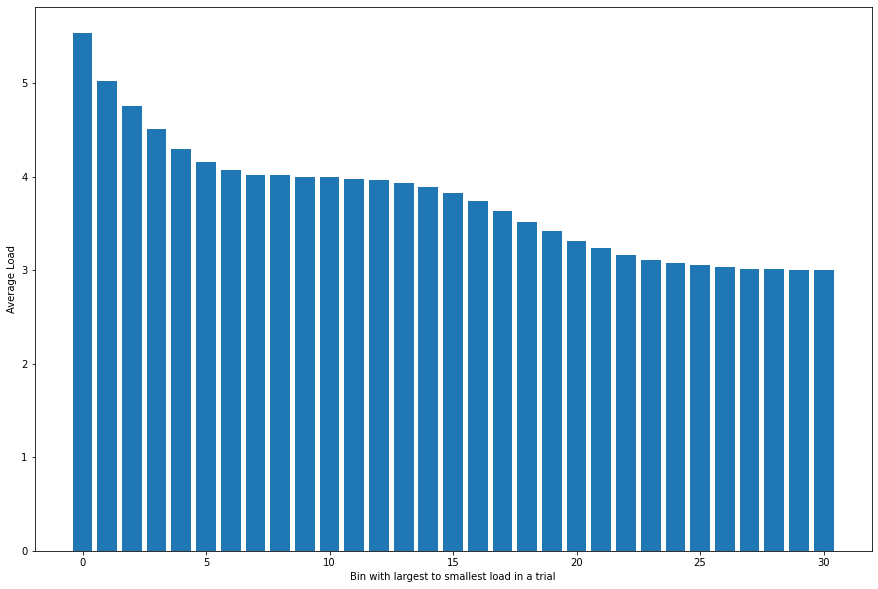

In [12]:
########################### Run experiments ##############################
average_load(1000, 10, 10)
average_load(1000, 100, 100)
average_load(1000, 1000, 1000)

## Interactive Balls and Bins
Below is an interactive version of the experiments above, where you can change the number of balls and bins. The "Single Trial" is simply a single balls and bins experiment. Note that the number of balls only affect the results for "Single Trial", "Max Load", and "Largest Average Load".

In [13]:
########################### Functions Declarations ###########################
def run_experiment(b):
    bins = n_slider.value
    balls = m_slider.value
    # Clear previous output
    with out:
            clear_output(True)
            
    plt.rcParams["figure.figsize"] = (15,10)
    # Run and plot individual experiment
    if dropdown.value == "Single Trial":
        results = simulate_bnb(bins, balls)
        with out:
            plt.xlabel("Bin number")
            plt.ylabel("Number of balls")
            plt.bar(results.keys(), results.values(), width=20/bins, align='edge')
            plt.show()
            
    elif dropdown.value == "Classic Birthday Paradox":
        with out:
            plt.xlabel("Number of balls")
            plt.ylabel("Experimental Probability")
            run_cols(bins, 100, 0, 100 * bins, True)
    
    elif dropdown.value == "Triple Birthday Paradox":
        with out:
            plt.xlabel("Number of balls")
            plt.ylabel("Experimental Probability")
            run_tricol(100, bins)
        
    elif dropdown.value == "Coupon Collector":
        with out:
            plt.xlabel("Number of balls")
            plt.ylabel("Experimental Probability")
            results = run_coupons(50, bins)
        
    elif dropdown.value == "Max Load":
        with out:
            results = max_load(100, bins, balls)

    elif dropdown.value == "Largest Average Load":
        with out:
            average_load(100, bins, balls)

# Links and declares the widgets used
def setup_widgets():
    # Set up experiment type selection
    dropdown = widgets.Dropdown(
    options=['Single Trial', 'Classic Birthday Paradox', 'Triple Birthday Paradox',
             'Coupon Collector', 'Max Load', 'Largest Average Load'],
    value='Single Trial',
    description='Experiment: ')
    display(dropdown)
    
    # Set up bin slider and text box
    n_text = widgets.IntText(description="Bins", max=100, min=1, value=100)
    n_slider = widgets.IntSlider(description="Bins", max=100, min=1, layout=item_layout)
    left = VBox([n_text, n_slider], layout=inner_layout)

    # Set up ball slider and text box
    m_text = widgets.IntText(description="Balls", max=1000, min=1, value=50)
    m_slider = widgets.IntSlider(description="Balls", max=1000, min=1, layout=item_layout)
    right = VBox([m_text, m_slider],layout=inner_layout)

    box = HBox([left, right], layout=box_layout)

    # Link widgets
    widgets.jslink((n_text, 'value'), (n_slider, 'value'))
    widgets.jslink((m_text, 'value'), (m_slider, 'value'))

    # Set up button
    button = widgets.Button(description="Run experiment", layout=inner_layout)
    button_box = HBox([button],layout=box_layout)
    display(box, button_box)
    
    return (n_slider, m_slider, button, dropdown)


#################### Layouts for widgets #####################
box_layout = Layout(display='flex',
                    justify_content='center',
                    align_items='stretch',
                    width='100%')
inner_layout = Layout(display='flex',
                    justify_content='center',
                    align_items='stretch',
                    border='solid',
                    width='50%')
item_layout = Layout(
                    justify_content='center',
                    align_items='stretch',
                    width='90%')


######################### Widget setup ###########################
widget_out= setup_widgets()
n_slider = widget_out[0]
m_slider = widget_out[1]
button = widget_out[2]
dropdown = widget_out[3]
button.on_click(run_experiment)

out = widgets.Output()
display(out)

Dropdown(description='Experiment: ', options=('Single Trial', 'Classic Birthday Paradox', 'Triple Birthday Par…

Output()